In [21]:
import matplotlib.pyplot as plt
import networkx as nx
import random as rm
import numpy as np
from numpy.random import default_rng

rng = default_rng()

In [22]:
def str2int_arr(str):
    return np.array([float(i) for i in str], dtype="byte")

def graph_from_file(file):
    w = []
    with open(file, "r") as f:
        for line in f:
            arr = line.split()
            map(int, arr)
            w.append(str2int_arr(arr))
    return nx.from_numpy_matrix(np.array(w))

def graph_from_dimacs(file):
    G = nx.Graph()
    with open(file, "r") as f:
        for line in f:
            buff = line.split()
            if buff[0]=="p":
                G.add_nodes_from([i for i in range(1, int(buff[2])+1 )])
                break
        for line in f:
            edge = line.split()
            G.add_edge(int(edge[1]), int(edge[2]))
    return G

In [315]:
def f_activations(x):
    return 1 / ( 1 + np.exp(x) )

def f_act01(x):
    return 1 if x > 0 else 0

def energy(X, W, B=1):
    n = len(X)
    sum = 0
    for i in range(n):
        for j in range(i, n):
            sum += W[i, j]*X[i]*X[j]
    
    n = np.sum(X)
    return n + (-n*(n-1)//2 + sum)*B, n, -n*(n-1)//2, sum#(-n*(n-1)//2 + sum//2) * B + n
    
def multy_mutation(individual):
    n = individual.size
    num_mutation=n//3
    
    for _ in range(num_mutation):
        individual[np.random.randint(0, n)] ^= 1
    return individual

def NN(W, X ,B=0.5, times=1000):
    N = X.size
    h_i = 1
    energies = np.array([], dtype="int")
    xs = []
    
    iter_no_change = np.intc(0)

    for _ in range(times):
        
        i = rng.integers(N)  # num_update
        X_next = 0
        
        for j in range(N):
            X_next += (1-W[i, j])*X[j]
        X_next = f_act01(X_next*(-B) + h_i)
        
        # X_next = f_act01(np.dot(W[i][:], X) - h_i)
        
        
        if X[i] == X_next:
            iter_no_change += 1
        else:
            iter_no_change = np.intc(0)
            X[i] = X_next
            energies = np.append(energies, energy(X, W, B)[0])
            xs.append(X.copy())
            # print(X)
            
        if( iter_no_change>=mnitc): 
            break
        
    return X, energies, xs

C:\Users\arkad\AppData\Local\Temp\ipykernel_14408\2454679448.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(G).todense()


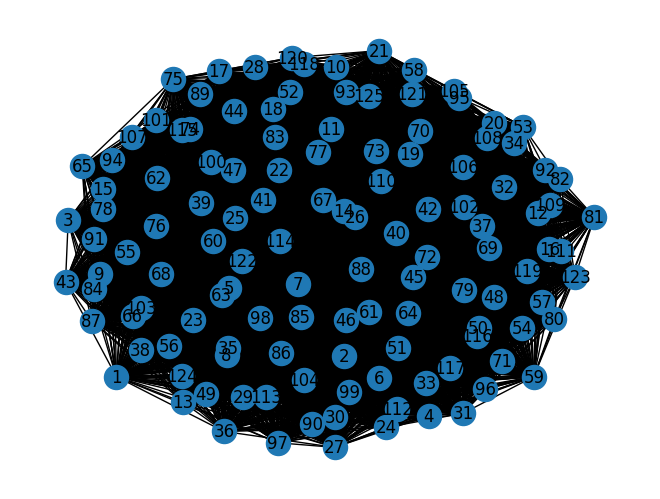

In [316]:
# G = graph_from_file("graph_examples/34_14")
G = graph_from_dimacs("DIMACS_subset_ascii/C125.9.clq")
W = nx.adjacency_matrix(G).todense()
nx.draw(G, with_labels=True)

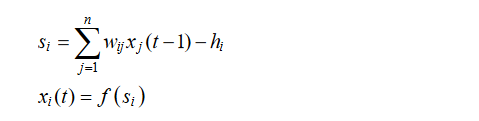

In [322]:
X = np.ones(G.number_of_nodes(), dtype="byte")
X, energies, xs = NN(W, X, 0.6, 10000)

    
print(X, energies, sep="\n")
xs

[1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0
 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 1]
[-337.4 -328.2 -319.  -311.  -305.4 -299.2 -294.8 -291.6 -283.  -275.6
 -268.8 -263.8 -258.8 -253.8 -249.4 -243.8 -237.6 -230.2 -223.4 -217.2
 -211.  -207.2 -203.4 -197.8 -193.4 -185.4 -180.4 -177.2 -174.  -169.
 -165.8 -163.2 -158.8 -157.4 -153.  -149.2 -144.2 -139.2 -132.4 -131.6
 -126.6 -121.  -117.8 -113.4 -107.8 -104.6  -99.   -94.6  -92.6  -91.2
  -84.4  -81.8  -79.2  -78.4  -71.6  -67.2  -64.   -61.4  -55.8  -52.
  -50.   -43.8  -41.2  -39.2  -37.2  -35.2  -35.6  -35.4  -35.2  -33.8
  -32.4  -28.   -27.8  -27.   -26.8  -25.4  -24.   -23.6  -22.8  -20.2
  -18.8  -14.4  -12.4   -9.8   -8.4   -5.8   -5.    -1.8   -1.     0.4
    0.8    1.6    2.     4.     3.6    3.2    3.6    6.2   10.     9.6
    9.2    8.8   10.2   10.6   11.   

[array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int8),
 array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int8),
 array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [323]:
energy(np.array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1], dtype="int"), W, 1)

(34, 34, -561, 561)

In [252]:
hi = np.linspace(-5, 5, 10)

Xi = [(NN(W, np.ones(G.number_of_nodes(), dtype="byte")[0] ,B=i, times=1000), i) for i in hi]
Xi

IndexError: invalid index to scalar variable.

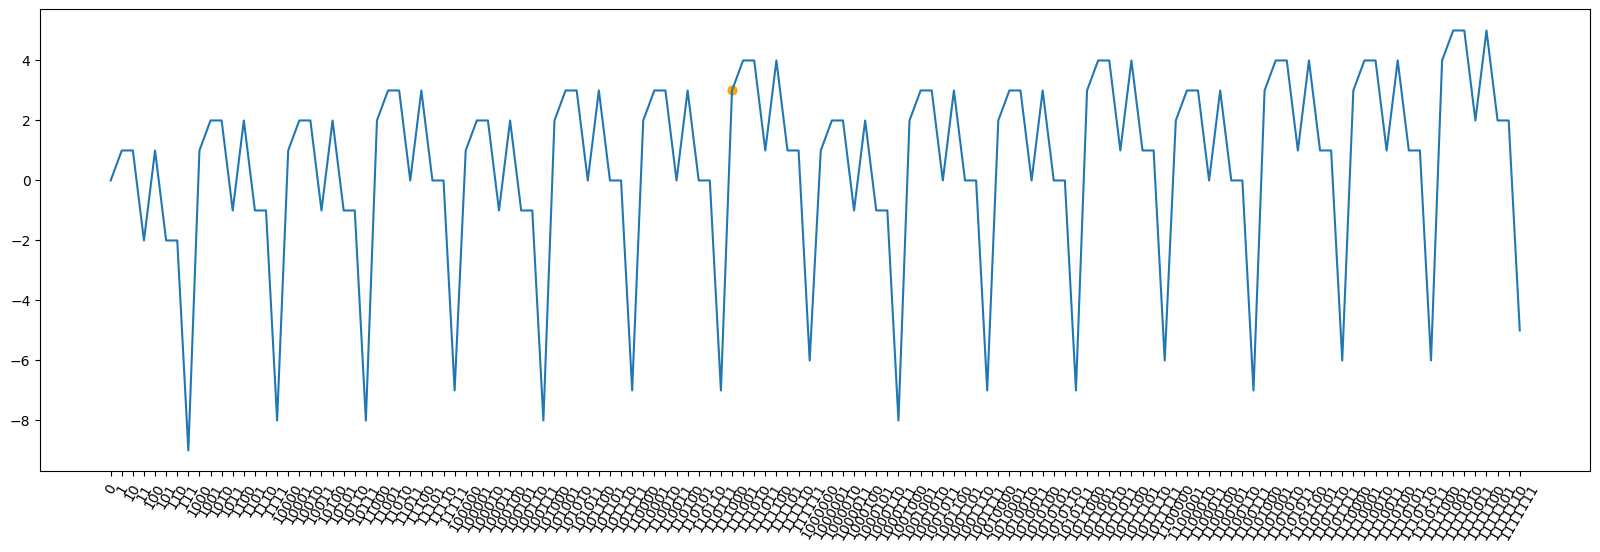

In [246]:
size_gr = 2**G.number_of_nodes()
x = list(range(size_gr))
y = list(range(size_gr))
for i in range(size_gr):
    x[i] = format(x[i], "b")
    y[i] = energy(str2int_arr(format(size_gr+i, "b"))[1:], W, B=4)[0]

plt.figure(figsize=(20,6))
plt.xticks(rotation=60)
plt.plot(x, y)

plt.scatter(x[56], y[56], color='orange', s=40, marker='o')


In [95]:
sub =  np.array([1, 0, 1, 0, 1, 1, 1, 0])
energy(sub, W)

(2, 5, -10, 7)

In [43]:
sub =  np.array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1])
energy(sub, W)

(13, -78, 57)